# Schwarshild coordinates Einstein Tensor calculations using Symbolic module
## The nonlocal breather

In [2]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import einsteinpy

from sympy import symbols, sin, cos, sinh, ln
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()
print(einsteinpy.__version__)



0.4.0


### Idea is to follow the Nov 1 2021 work where i used energy density to get a guess at a vacuum breather.

#### Make time tick regular, waves get longer as they go to bigger r, these are waves of gravitational field energy (the energy in the grav potential field), they need to get longer to support the fact that we need to hold a fraction F of the mean mass M in the wave. 



![alt-text](img/schwarschild.png "Schwarschild coords")


In [3]:
syms = sympy.symbols("t r theta phi")
G, M, F, a, w = sympy.symbols("G M F a w")
#a = M*(1 - F*sin(w*(syms[0] - 1/(w*F)*ln(syms[1])))) + M*(1 - F*sin(w*(syms[0] + 1/(w*F)*ln(syms[1]))))

a = M*(1 - F*sin(w*(syms[0] - 1/(w*F)*ln(syms[1]))))


mT = sympy.diff(a, syms[0])
print(mT)
mR = sympy.diff(a, syms[1])
print(mR)


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]

#take your pick
list2d[0][0] = -mT*mT/(mR*mR)/(1 - 2*a/syms[1])
#list2d[0][0] = mT/mR/(1 - 2*a/syms[1])
#list2d[0][0] = -1/(1 - 2*a/syms[1])

list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - 2*a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()



-F*M*w*cos(w*(t - log(r)/(F*w)))
M*cos(w*(t - log(r)/(F*w)))/r


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

⎡                 2  2  2                                                                        ⎤
⎢               -F ⋅r ⋅w                                                                         ⎥
⎢───────────────────────────────────────                     0                     0       0     ⎥
⎢      ⎛       ⎛  ⎛    log(r)⎞⎞    ⎞                                                             ⎥
⎢  2⋅M⋅⎜- F⋅sin⎜w⋅⎜t - ──────⎟⎟ + 1⎟                                                             ⎥
⎢      ⎝       ⎝  ⎝     F⋅w  ⎠⎠    ⎠                                                             ⎥
⎢- ───────────────────────────────── + 1                                                         ⎥
⎢                  r                                                                             ⎥
⎢                                                                                                ⎥
⎢                                                            1                                   ⎥
⎢         

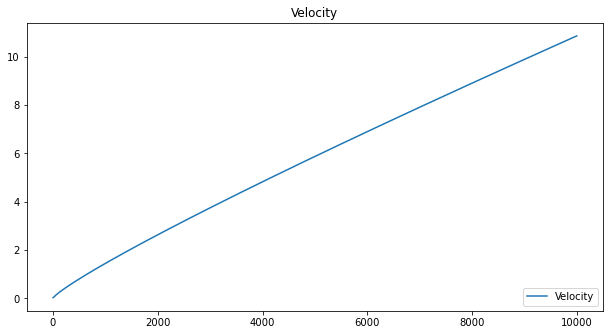

In [4]:
#wave front velocity as a function of r
# for a typical sine wave travelling along we have (v == velocity) 
#normalSin = sin(w*(syms[0] - syms[1]/v))
#so for us we have a wave front velocity - just mult by r/r and v
#normalSin = sin(w*(syms[0] - syms[1]/(syms[1]/ln(syms[1]*F)))
F = 0.01
w = 1

#Make x values - which we will sub in for r 
x = np.arange(2.0, 10000.0, 1)
vel = x*F*w/(np.log(x))

fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,vel, label="Velocity")

ax.set_title("Velocity")

ax.legend(loc="lower right")


### Calculating the Einstein Tensor (with both indices covariant)

In [5]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

⎡           2    2    ⎛      log(r)⎞                                        ⎛      log(r)⎞                                         
⎢      2.0⋅F ⋅M⋅w ⋅cos⎜t⋅w - ──────⎟                            -2⋅F⋅M⋅w⋅cos⎜t⋅w - ──────⎟                                         
⎢                     ⎝        F   ⎠                                        ⎝        F   ⎠                                         
⎢─────────────────────────────────────────                 ─────────────────────────────────────                                   
⎢           ⎛      log(r)⎞                                   ⎛         ⎛      log(r)⎞          ⎞                                   
⎢2.0⋅F⋅M⋅sin⎜t⋅w - ──────⎟ - 2.0⋅M + 1.0⋅r                 r⋅⎜2⋅F⋅M⋅sin⎜t⋅w - ──────⎟ - 2⋅M + r⎟                                   
⎢           ⎝        F   ⎠                                   ⎝         ⎝        F   ⎠          ⎠                                   
⎢                                                                           

In [6]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡ 2  2 ⎛      ⎛     ⎛      log(r)⎞        ⎛      log(r)⎞    ⎞     ⎛         ⎛      log(r)⎞          ⎞ ⎛         ⎛      log(r)⎞     
⎢F ⋅w ⋅⎜- M⋅r⋅⎜F⋅sin⎜t⋅w - ──────⎟ + 2⋅cos⎜t⋅w - ──────⎟ - 1⎟ + 2⋅⎜2⋅F⋅M⋅sin⎜t⋅w - ──────⎟ - 2⋅M + r⎟⋅⎜3⋅F⋅M⋅sin⎜t⋅w - ──────⎟ + M⋅
⎢      ⎝      ⎝     ⎝        F   ⎠        ⎝        F   ⎠    ⎠     ⎝         ⎝        F   ⎠          ⎠ ⎝         ⎝        F   ⎠     
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                                 2                                
⎢                                                              ⎛         ⎛      log(r)⎞          ⎞                                 
⎢                                                              ⎜2⋅F⋅M⋅sin⎜t⋅w - ──────⎟ - 2⋅M + r⎟                                 
⎢                                                              ⎝         ⎝  

(t, r, theta, phi, F, M, w)


Text(0.5, 1.0, 'Einstein Tensor, G')

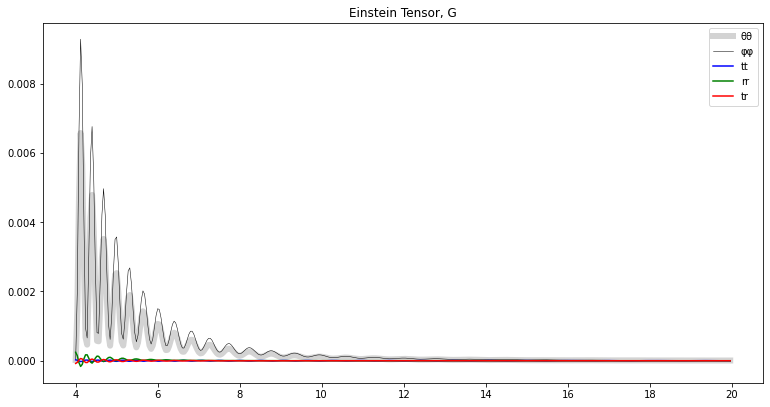

In [7]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

theta = 1
phi = 1
F = 0.01
M = 1
w = 0.5
t = 1


#Make x values - which we will sub in for r 
x = np.arange(4.0, 20.0, 0.04)

# Call the functions
# note: what scale to use on these ? when is it appropriate to divide by r**2, etc? 
tt = func(t,x,theta, phi, F, M, w)[0][0]

tr = func(t,x,theta, phi, F, M, w)[0][1]/(x*x)

rr = func(t,x,theta, phi, F, M, w)[1][1]/(x*x)**2

hh = func(t,x,theta, phi, F, M, w)[2][2]/(x*x)**2

pp = func(t,x,theta, phi, F, M, w)[3][3]/(x*x*sin(theta)*sin(theta))**2


fig=plt.figure(figsize=(10, 5))
ax=fig.add_axes([0,2,1.0,1.0])

ax.plot(x,hh, "lightgrey",label="θθ", linewidth=6.0)
ax.plot(x,pp, "black",label="φφ", linewidth=0.5)

ax.plot(x,tt, "-b", label="tt")
ax.plot(x,rr, "-g", label="rr")
ax.plot(x,tr, "-r", label="tr")

ax.legend(loc="upper right")
ax.set_title("Einstein Tensor, G")


#NOT Zero 


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

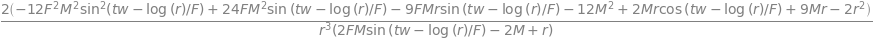

In [8]:
# Ricci scalar
R = RicciScalar.from_riccitensor(ri)
R.simplify()
R.expr


No handles with labels found to put in legend.


(t, r, theta, phi, F, M, w)


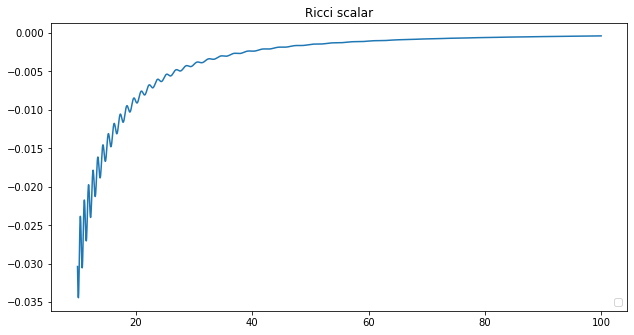

In [9]:
#plot the Ricci scalar

args, funcR = R.tensor_lambdify()
print(args) # these are the argument values 

t = 5

theta = 1
phi = 1
F = 0.01
M = 1
w = 0.5

#Make x values - which we will sub in for r 
x = np.arange(10.0, 100.0, 0.04)

# Call the functions
ricci = funcR(t,x,theta, phi, F, M, w)

fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
ax.set_title("Ricci scalar")
ax.legend(loc="lower right")
ax.plot(x,ricci, label="Ricci scalar")



In [10]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

⎡                                                                                                                                  
⎢                                                                                                                                  
⎢                                                                                                                                  
⎢                                                                                                                                  
⎢                                                                                                                                  
⎢                                                                                                                                  
⎢                                                                                                                                  
⎢                                                                           

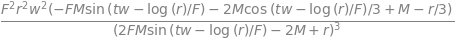

In [11]:
weyl[0,1,0,1]

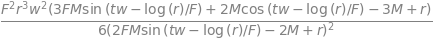

In [12]:
weyl[0,2,0,2]

(t, r, theta, phi, F, M, w)


Text(0.5, 1.0, 'Weyl tensor')

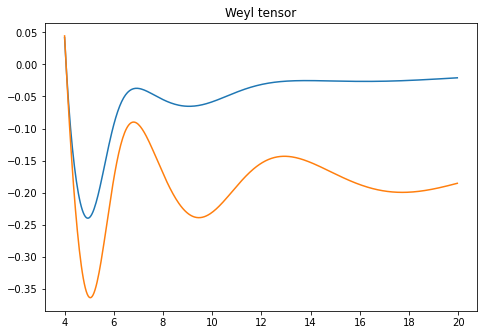

In [13]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

t = 1

theta = 1
phi = 1
F = 0.1
M = 1
w = 10



#Make x values - which we will sub in for r 
x = np.arange(4, 20.0, 0.04)

# Call the functions
y = func(t,x,theta, phi, F, M, w)[0][1][0][1]/x
z = -func(t,x,theta, phi, F, M, w)[0][2][0][2]/(x*x) # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("Weyl tensor")


